# WeatherPy



Analyasis 
1. As we're approaching the March equinox, you can see the max tempatures roughly around the equator line because the earth is close to being vertical to the sun. 
2. For cloudiness we see a rows of cities with 0, 20, 40, 70, and 90 percent cloudiness. Further investigation would need to be done to determine if this is a weather phenomenon, or caused by the way cloudiness is reported.  
3. The majority of cities have a humidity higher than 40% this could be because most citites are built close to water.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime 

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
idk_lat = []
idk_lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        idk_lat.append(lat_lng[0])
        idk_lng.append(lat_lng[1])
        

# Print the city count to confirm sufficient count
len(cities)

coords = pd.DataFrame(
    {'lats': idk_lat,
    'lngs': idk_lng,
   'City': cities
    })

In [3]:
cities_name = coords["City"]

# Weather stuff

In [4]:
def weather_info(city):


    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    q = city
    params = {

    'APPID': api_key,
    'q': q,
    'units':'imperial',
  }

    try: 
        out_json = requests.get(url= base_url, params=params).json()
        cloud = out_json['clouds']['all']
        country = out_json['sys']['country']
        date = out_json['dt']
        humidity = out_json['main']['humidity']
        temp = out_json['main']['temp_max']
        wind = out_json['wind']['speed']

        return {
        'City': q,
        'Cloudiness': cloud,
        'Country': country,
        'Date': str(date),
        'Humidity': humidity,
        'Max Temp': temp,
        'Wind Speed': wind
    }
    except (KeyError, IndexError):
        print(f"     {city} not found. Skipping...")
        return {
            'City': q,
            'Cloudiness': np.nan,
            'Country': np.nan,
            'Date': np.nan,
            'Humidity': np.nan,
            'Max Temp': np.nan,
            'Wind Speed': np.nan
        }


In [5]:
d = 1
set_count = 0 
city_weather = []
city_name = 0
print(f"----------------------------------------")
for cities in range(len(cities_name)):
    set_count += 1
    weather = weather_info(cities_name[cities])
    city_weather.append(weather)

    try:
        print(f"Processing Record {set_count} of Set {d}:{cities_name[cities]}")
        if set_count == 50:
            d += 1
            set_count = 0
            city_name +=1
            print(f"----------------------------------------")
    except (KeyError, IndexError):
        print(f"PANIC")
print(f"----------------------------------------")
city_weather
df = pd.DataFrame(city_weather)
df.set_index('City')
df2 = pd.merge(df, coords, how="left", on=["City", "City"])

----------------------------------------
Processing Record 1 of Set 1:albany
     zhanatas not found. Skipping...
Processing Record 2 of Set 1:zhanatas
Processing Record 3 of Set 1:cidreira
Processing Record 4 of Set 1:kapaa
Processing Record 5 of Set 1:piranhas
Processing Record 6 of Set 1:santa fe
Processing Record 7 of Set 1:hobart
Processing Record 8 of Set 1:lorengau
Processing Record 9 of Set 1:bredasdorp
Processing Record 10 of Set 1:qaanaaq
Processing Record 11 of Set 1:ushuaia
Processing Record 12 of Set 1:hilo
Processing Record 13 of Set 1:mayo
Processing Record 14 of Set 1:punta arenas
Processing Record 15 of Set 1:dubbo
Processing Record 16 of Set 1:bilibino
Processing Record 17 of Set 1:uige
Processing Record 18 of Set 1:las palmas
Processing Record 19 of Set 1:mataura
Processing Record 20 of Set 1:severo-kurilsk
Processing Record 21 of Set 1:elizabeth city
Processing Record 22 of Set 1:bathsheba
Processing Record 23 of Set 1:luderitz
Processing Record 24 of Set 1:hermanus

Processing Record 37 of Set 4:jinchang
Processing Record 38 of Set 4:saint-augustin
     cheuskiny not found. Skipping...
Processing Record 39 of Set 4:cheuskiny
Processing Record 40 of Set 4:lebu
Processing Record 41 of Set 4:palora
     palabuhanratu not found. Skipping...
Processing Record 42 of Set 4:palabuhanratu
     mocambique not found. Skipping...
Processing Record 43 of Set 4:mocambique
Processing Record 44 of Set 4:norman wells
Processing Record 45 of Set 4:victoria
Processing Record 46 of Set 4:atar
     krasnoselkup not found. Skipping...
Processing Record 47 of Set 4:krasnoselkup
Processing Record 48 of Set 4:novyy nekouz
Processing Record 49 of Set 4:tateyama
Processing Record 50 of Set 4:san matias
----------------------------------------
Processing Record 1 of Set 5:kanniyakumari
Processing Record 2 of Set 5:shebunino
     temaraia not found. Skipping...
Processing Record 3 of Set 5:temaraia
Processing Record 4 of Set 5:pevek
Processing Record 5 of Set 5:hovd
Processin

Processing Record 27 of Set 8:hamilton
Processing Record 28 of Set 8:sorata
Processing Record 29 of Set 8:rincon
Processing Record 30 of Set 8:flinders
Processing Record 31 of Set 8:nome
Processing Record 32 of Set 8:morehead
Processing Record 33 of Set 8:fortuna
Processing Record 34 of Set 8:broken hill
Processing Record 35 of Set 8:ossora
Processing Record 36 of Set 8:kaeo
Processing Record 37 of Set 8:greenville
Processing Record 38 of Set 8:waipawa
Processing Record 39 of Set 8:canandaigua
Processing Record 40 of Set 8:husavik
Processing Record 41 of Set 8:san luis
Processing Record 42 of Set 8:quatre cocos
Processing Record 43 of Set 8:maracacume
Processing Record 44 of Set 8:lasa
Processing Record 45 of Set 8:clyde river
Processing Record 46 of Set 8:ulety
Processing Record 47 of Set 8:bustamante
Processing Record 48 of Set 8:leningradskiy
Processing Record 49 of Set 8:los alamos
Processing Record 50 of Set 8:pemba
----------------------------------------
Processing Record 1 of S

Processing Record 13 of Set 12:kyabram
Processing Record 14 of Set 12:aksu
Processing Record 15 of Set 12:miri
Processing Record 16 of Set 12:yaring
Processing Record 17 of Set 12:isangel
     tumannyy not found. Skipping...
Processing Record 18 of Set 12:tumannyy
Processing Record 19 of Set 12:coihaique
Processing Record 20 of Set 12:hay river
Processing Record 21 of Set 12:camara de lobos
Processing Record 22 of Set 12:grindavik
Processing Record 23 of Set 12:turka
Processing Record 24 of Set 12:denpasar
Processing Record 25 of Set 12:kulhudhuffushi
Processing Record 26 of Set 12:soller
Processing Record 27 of Set 12:mata
Processing Record 28 of Set 12:markivka
Processing Record 29 of Set 12:kiruna
Processing Record 30 of Set 12:mabaruma
Processing Record 31 of Set 12:isparta
Processing Record 32 of Set 12:mahibadhoo
Processing Record 33 of Set 12:ixtapa
Processing Record 34 of Set 12:essex
Processing Record 35 of Set 12:amuntai
Processing Record 36 of Set 12:luleburgaz
Processing Re

In [6]:
df2.dropna()

,City,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed,lats,lngs
0,albany,75.0,US,1551980013,41.0,28.00,4.70,-81.754008,103.181055
2,cidreira,36.0,BR,1551980256,98.0,80.85,3.71,-36.416926,-45.136258
3,kapaa,75.0,US,1551979804,64.0,71.60,20.80,35.194529,-171.869513
4,piranhas,44.0,BR,1551980256,69.0,86.39,7.07,-16.473241,-51.517760
5,santa fe,68.0,AR,1551980186,55.0,95.00,4.00,-31.458415,-60.516949
6,hobart,75.0,AU,1551980115,44.0,60.80,14.99,-59.365376,146.181445
7,lorengau,64.0,PG,1551980257,100.0,82.20,6.17,15.308257,150.982859
8,bredasdorp,88.0,ZA,1551979872,87.0,60.80,5.82,-69.143618,22.770147
9,qaanaaq,0.0,GL,1551980258,75.0,-4.07,3.60,82.682387,-83.150988
10,ushuaia,90.0,AR,1551979800,86.0,39.20,23.04,-80.655821,-40.498924


In [7]:
today = datetime.now()
today = today.strftime("%Y-%m-%d %H:%M")

# Latitude vs. Temperature Plot

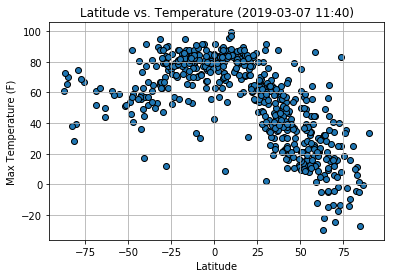

In [18]:
plt.scatter(x=df2['lats'], y=df2['Max Temp'], edgecolor='black')
plt.title(f"Latitude vs. Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("lat_temp.png")
plt.show()

# Latitude vs. Humidity Plot

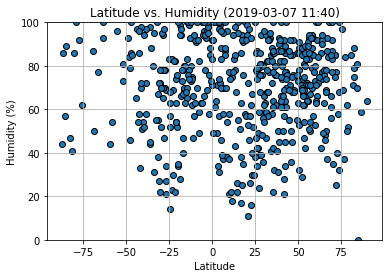

In [15]:
plt.scatter(x=df2['lats'], y=df2['Humidity'], edgecolor='black')
plt.ylim(0,100)
plt.title(f"Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("lat_humidity.png")
plt.show()

In [ ]:
DataFrame.std()

# Latitude vs. Cloudiness Plot

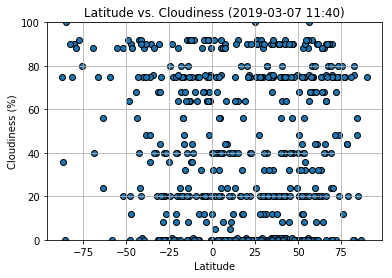

In [16]:
plt.scatter(x=df2['lats'], y=df2['Cloudiness'], edgecolor='black')
plt.title(f"Latitude vs. Cloudiness ({today})")
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("lat_cloudiness.png")
plt.show()

# Latitude vs. Wind Speed Plot

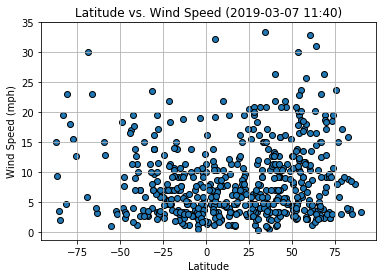

In [17]:
plt.scatter(x=df2['lats'], y=df2['Wind Speed'], edgecolor='black')
plt.title(f"Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("lat_windspeed.png")
plt.show()

In [12]:
df2.to_csv(r'output_file.csv')
